<a href="https://colab.research.google.com/github/matheuslbrito/matheuslbrito/blob/main/Exerc%C3%ADcioMentoria2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício**



O objetivo deste exercício é praticar atividades de obtenção, manipulação e análise de dados que seriam desempenhadas por um gestor de portfólio.

O foco é a biblioteca Pandas, mas você pode utilizar outra bibliotecas sempre que julgar necessário.

No exercício, você precisa desempenhar as seguintes tarefas:

1. Carregar no Python com a biblioteca pandas os arquivos .csv e .txt que foram passados. O arquivo .csv contém cotações de papéis brasileiros, e o arquivo .txt contém cotações de ações americanas.
2. Utilizando a biblioteca yfinance, ou alguma outra fonte de sua escolha, obtenha os dados da cotação do dólar (apenas o Close) desde o dia inicial do dataframe das ações americanas (.txt).
3. **Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.**
4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.
5. Agora você vai simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?
6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.
7. Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.
8. Qual era o saldo da carteira no dia 02/03/2020?



**Dicas importantes**

a. Na hora de carregar os arquivos .csv e .txt, fique atento à suas características, como separador, marcador decimal, formato do índice, dentre outros

b. Possivelmente, os dados da cotação do dólar vão ter um número de linhas superior ao dataframe de ações americanas, mesmo que sejam referentes à mesma data de início e de fim. Você pode utilizar o método reindex para equalizar os índices e garantir que tenham o mesmo número de linhas

c. Para realizar a multiplicação entre o dataframe de ações americanas e cotação do dólar, você pode usar o método "mul", com uma estrutura parecida com esta:

*americanas.mul(dolar, axis=0)*

# Resolução

## TASK 1 - Importação de dados

### Importação de bibliotecas:

In [1]:
import pandas as pd
import os

!pip install -q yfinance
import yfinance as yf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Definição do diretório com os dados no google drive**

In [2]:
novo_local = os.chdir("/content/drive/MyDrive/_EXITO/Desafio Gestão Fundos")

In [3]:
caminho = os.getcwd()
caminho

'/content/drive/MyDrive/_EXITO/Desafio Gestão Fundos'

In [4]:
arquivos = os.listdir(caminho)
arquivos

['acoes_americanas.txt',
 'acoes_brasileiras.csv',
 'MLB_ExercícioMentoria.ipynb']

### Criação dos DataFrames com ações americanas e brasileiras:

In [11]:
equities = pd.read_csv("acoes_americanas.txt", sep = ";")
equities.set_index(['Date'], drop = True, inplace = True)
equities.head(5)

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,5.922567,19.046688,NaN,37.577785,25.791210
2008-01-03,5.925303,19.246229,NaN,37.570412,25.901058
2008-01-04,5.472996,19.283632,NaN,36.360840,25.176090
2008-01-07,5.399737,19.738840,NaN,35.630688,25.344519
2008-01-08,5.205502,19.819902,NaN,34.221977,24.495070


In [6]:
acoes = pd.read_csv("acoes_brasileiras.csv", sep = ";", decimal=',')
acoes.set_index(['Date'], drop = True, inplace = True)
acoes.head(5)

# Dúvida inicial: Faz sentido esse preço de LREN3?

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2005-01-03,5167.226562,3.752022,8.902522,0.825184
2005-01-04,5167.226562,3.707412,8.539765,0.825184
2005-01-05,5167.226562,3.693071,8.480296,0.825184
2005-01-06,5167.226562,3.704225,8.444613,0.825184
2005-01-07,5167.226562,3.720555,8.670596,0.825184


**Conhecendo um pouco melhor dos dados:**

In [7]:
equities.describe()

,AAPL,KO,META,MS,MSFT
count,3843.000000,3843.000000,2739.000000,3843.000000,3843.000000
mean,45.182744,34.249513,148.593118,36.918227,87.805868
std,48.585946,13.021926,86.131248,23.168089,89.022771
min,2.377052,12.142509,17.730000,7.001352,11.376364
25%,11.921888,23.789288,78.449997,21.242930,22.512109
50%,25.078003,32.807693,144.850006,28.998711,41.771603
75%,51.260590,42.589426,191.514999,43.315348,127.520821
max,180.683868,64.306442,382.179993,104.919655,339.075562


In [8]:
acoes.describe()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
count,4541.000000,4541.000000,4541.000000,4541.000000
mean,218.200204,9.865522,28.840402,8.891268
std,1301.405980,4.845685,20.734838,11.335573
min,0.892573,1.850761,5.583508,0.809005
25%,4.847134,6.899048,15.915184,2.040649
50%,10.345457,8.792815,21.834671,3.887066
75%,26.687101,12.070403,33.117466,8.600175
max,10334.453125,33.003029,95.894073,44.467350


**Validação da série de LREN3 para saber se os dados recebidos são críveis:**

In [9]:
LREN3 = yf.download('LREN3.SA', start = '2005-01-03', end = '2023-04-06')

[*********************100%***********************]  1 of 1 completed


In [10]:
LREN3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,7214.773438,7214.773438,7214.773438,7214.773438,5167.226562,0
2005-01-04,7214.773438,7214.773438,7214.773438,7214.773438,5167.226562,0
2005-01-05,7214.773438,7214.773438,7214.773438,7214.773438,5167.226562,0
2005-01-06,7214.773438,7214.773438,7214.773438,7214.773438,5167.226562,0
2005-01-07,7214.773438,7214.773438,7214.773438,7214.773438,5167.226562,0
...,...,...,...,...,...,...
2023-03-30,17.650000,18.100000,17.370001,17.639999,17.639999,24422300
2023-03-31,17.500000,17.730000,16.379999,16.570000,16.570000,50297100
2023-04-03,16.629999,16.629999,15.180000,15.410000,15.410000,51077800


**Observação:**

LREN3 sofreu os significativos splits após o começo do DataFrame:

Jun 30, 2005	1:253 Stock Split

Oct 04, 2006	5:1 Stock Split

## TASK 2 - Importação da cotação do dólar

**1ª Forma de Extração do yf:**

In [68]:
dolar = yf.download('BRL=X', start = '2008-01-02', end = '2023-04-07')



[*********************100%***********************]  1 of 1 completed


In [70]:
dolar.head(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,1.7760,1.7822,1.7560,1.7645,1.7645,0
2008-01-03,1.7645,1.7684,1.7480,1.7480,1.7480,0
2008-01-04,1.7480,1.7665,1.7391,1.7572,1.7572,0
2008-01-07,1.7615,1.7777,1.7451,1.7640,1.7640,0
2008-01-08,1.7640,1.7669,1.7460,1.7520,1.7520,0
2008-01-09,1.7520,1.7724,1.7520,1.7687,1.7687,0
2008-01-10,1.7687,1.7687,1.7577,1.7602,1.7602,0


In [39]:
dolar = dolar.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

In [40]:
dolar

,Close
Date,
2008-01-02,1.7645
2008-01-03,1.7480
2008-01-04,1.7572
2008-01-07,1.7640
2008-01-08,1.7520
...,...
2023-03-31,5.0927
2023-04-03,5.0623
2023-04-04,5.0631


**2ª Forma de Extração do yf:**

In [41]:
dolar2 = yf.download('BRL=X', start = '2008-01-02', end = '2023-04-07')['Close']

[*********************100%***********************]  1 of 1 completed


**Gráficos comparando as 2 formas de extração:**

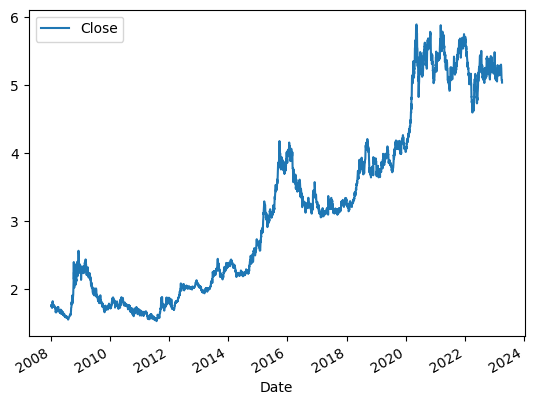

In [43]:
dolar.plot();

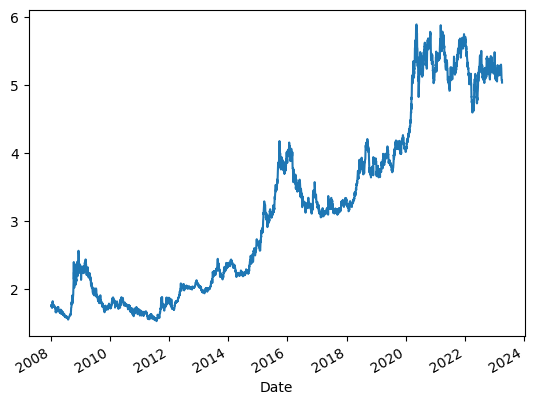

In [44]:
dolar2.plot();

## TASK 3 - Reordenação de index e conversão de moeda

### Reordenação de Index



Tamanho do dolar.index é maior que o arquivo original, por exemplo, podem ter dias que a bolsa americana não abriu e houve negociação de moedas.

In [45]:
dolar.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06'],
              dtype='datetime64[ns]', name='Date', length=3952, freq=None)

In [46]:
dolar = dolar.reindex(equities.index)

In [47]:
dolar.index

Index(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07', '2008-01-08',
       '2008-01-09', '2008-01-10', '2008-01-11', '2008-01-14', '2008-01-15',
       ...
       '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
       '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06'],
      dtype='object', name='Date', length=3843)

### Criação do dataframe de ações americanas em BRL

In [63]:
equities_brl = pd.DataFrame()

equities_brl = equities.mul(dolar['Close'], axis=0)

equities_brl.head()

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,10.450370,33.607882,NaN,66.306003,45.508591
2008-01-03,10.357431,33.642409,NaN,65.673081,45.275050
2008-01-04,9.617148,33.885199,NaN,63.893268,44.239426
2008-01-07,9.525137,34.819315,NaN,62.852535,44.707732
2008-01-08,9.120039,34.724469,NaN,59.956903,42.915361


In [64]:
equities_brl.tail()

,AAPL,KO,META,MS,MSFT
Date,,,,,
2023-03-31,839.786200,315.900175,1079.346851,447.139076,1468.225349
2023-04-03,841.202416,315.887541,1078.624342,441.230104,1454.044544
2023-04-04,838.601255,314.975438,1087.148808,429.452129,1454.020981
2023-04-05,830.377832,318.439967,1072.351650,425.026087,1441.802867
2023-04-06,828.766695,316.286275,1087.674505,423.745102,1467.681089


## TASK 4 - União de DataFrames

Unir o DataFrame de ações brasileiras com o DataFrame de ações americanas com valor convertido para BRL.

portfolio = pd.merge